In [1]:
import pandas as pd

# Load the cleaned dataset
dff = pd.read_csv('IMDBB fin.csv')

# Check basic info
dff.head()

,Title,Year,Rating,Directors,Stars,Votes,Gross Worldwide,Production Company,total_minute,Primary_Language,Genre_Cleaned
0,Jaat,2025,6.8,Gopichand Malineni,"Sunny Deol,Randeep Hooda,Regena Cassandrra",5400,531499,"Mythri Movie Makers, People Media Factory",158,Hindi,"Action, Drama, Thriller"
1,Chhaava,2025,7.4,Laxman Utekar,"Vicky Kaushal,Akshaye Khanna,Rashmika Mandanna",31000,8219603,Maddock Films,161,Hindi,"Action, Drama, History"
2,Good Bad Ugly,2025,7.0,Adhik Ravichandran,"Trisha Krishnan,Ajith Kumar,Priya Prakash Varrier",8000,1462902,Mythri Movie Makers,139,Tamil,"Action, Drama, Thriller"
3,Court - State vs a Nobody,2025,7.9,Ram Jagadeesh,"Priyadarshi Pulikonda,Harsh Roshan,Sri Devi",5400,133791,Wall Poster Cinema,155,Telugu,Drama
4,Deva,2025,6.8,Rosshan Andrrews,"Shahid Kapoor,Pooja Hegde,Saadhika Syal",24000,1091296,"Roy Kapur Films, Zee Studios",156,Hindi,"Crime, Drama, Mystery"


In [5]:
dff

,Title,Year,Rating,Directors,Stars,Votes,Gross Worldwide,Production Company,total_minute,Primary_Language,Genre_Cleaned
0,Jaat,2025,6.8,Gopichand Malineni,"Sunny Deol,Randeep Hooda,Regena Cassandrra",5400,531499,"Mythri Movie Makers, People Media Factory",158,Hindi,"Action, Drama, Thriller"
1,Chhaava,2025,7.4,Laxman Utekar,"Vicky Kaushal,Akshaye Khanna,Rashmika Mandanna",31000,8219603,Maddock Films,161,Hindi,"Action, Drama, History"
2,Good Bad Ugly,2025,7.0,Adhik Ravichandran,"Trisha Krishnan,Ajith Kumar,Priya Prakash Varrier",8000,1462902,Mythri Movie Makers,139,Tamil,"Action, Drama, Thriller"
3,Court - State vs a Nobody,2025,7.9,Ram Jagadeesh,"Priyadarshi Pulikonda,Harsh Roshan,Sri Devi",5400,133791,Wall Poster Cinema,155,Telugu,Drama
4,Deva,2025,6.8,Rosshan Andrrews,"Shahid Kapoor,Pooja Hegde,Saadhika Syal",24000,1091296,"Roy Kapur Films, Zee Studios",156,Hindi,"Crime, Drama, Mystery"
...,...,...,...,...,...,...,...,...,...,...,...
693,Haider,2014,8.0,Vishal Bhardwaj,"Shahid Kapoor,Shraddha Kapoor",59000,1404307,"UTV Motion Pictures, Vishal Bhardwaj Pictures",160,Hindi,"Crime, Drama, Thriller"
694,Shanmukha,2025,3.4,Shanumugam Sappani,"Avika Gor,Krishna Alluri",358,481860,Sapbro Productions,121,Telugu,"Fantasy, Thriller"
695,Liger,2022,2.6,Puri Jagannadh,"Vijay Deverakonda,Ananya Panday,Ramya Krishnan",48000,4879486,"Dharma Productions, Puri Connects",140,Hindi,"Drama, Romance, Sport"
696,Demonte Colony 2 (Vengeance of the Unholy),2024,6.6,R. Ajay Gnanamuthu,"V J Archana,Arulnithi,C. Arunpandian",4400,142987,"BTG Universal, Gnanamuthu Pattarai, Raaj Varma...",144,Tamil,"Horror, Thriller"


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
top_combinations_df = (
    dff[["Gross Worldwide", "Rating"]]
    .value_counts()
    .head(10)
    .reset_index(name="Count")
)
top_combinations_df 

,Gross Worldwide,Rating,Count
0,987421,8.0,4
1,481860,8.3,4
2,481860,6.7,4
3,481860,7.7,4
4,50013,8.7,3
5,481860,8.6,3
6,131028,7.8,3
7,481860,8.1,3
8,50013,6.4,2
9,349271,7.4,2


In [23]:
# Step 1: Get top 10 most frequent Gross Worldwide + Rating combinations
top_combinations_df = (
    dff[["Gross Worldwide", "Rating"]]
    .value_counts()
    .head(10)
    .reset_index()
    .drop(columns="count")  # Drop the count column
)

# Step 2: Merge with original dataframe to get the movie titles
result_df = dff.merge(top_combinations_df, on=["Gross Worldwide", "Rating"], how="inner")

# Step 3: Select desired columns, remove duplicates, reset index, and sort by Gross Worldwide descending
result_df = (
    result_df[["Title", "Gross Worldwide", "Rating"]]
    .drop_duplicates()
    .sort_values(by="Gross Worldwide", ascending=False)
    .reset_index(drop=True)
)


In [25]:
result_df 

,Title,Gross Worldwide,Rating
0,Lucky Baskhar,987421,8.0
1,Operation Java,987421,8.0
2,Malik,987421,8.0
3,Ugramm,987421,8.0
4,Kendasampige,481860,8.3
5,Traffic,481860,8.1
6,Chithram,481860,8.6
7,Curry & Cyanide: The Jolly Joseph Case,481860,6.7
8,Gaalipata,481860,8.3
9,Maestro,481860,6.7


In [37]:
# Optional: Convert Gross Worldwide to numeric if it's in string format
dff["Gross Worldwide"] = (
    dff["Gross Worldwide"]
    .replace('[\$,]', '', regex=True)
    .replace(',', '', regex=True)
    .astype(float)
)

# Step 1: Get top 10 most frequent Gross Worldwide + Rating combinations
top_combinations_df = (
    dff[["Gross Worldwide", "Rating"]]
    .value_counts()
    .head(10)
    .reset_index()
    .drop(columns="count")
)

# Step 2: Merge with original dataframe to get titles
result_df = dff.merge(top_combinations_df, on=["Gross Worldwide", "Rating"], how="inner")

# Step 3: Select, sort, drop duplicates, and take top 10
result_df = (
    result_df[["Title", "Gross Worldwide", "Rating"]]
    .drop_duplicates()
    .sort_values(by="Gross Worldwide", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# Step 4: Calculate totals
total_gross = result_df["Gross Worldwide"].sum()
rating_counts = result_df["Rating"].sum()


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Dell\AppData\Local\Temp\ipykernel_26036\1778275334.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [35]:
total_gross

6840844.0

In [39]:
rating_counts

78.7

In [29]:
result_df

,Title,Gross Worldwide,Rating
0,Lucky Baskhar,987421.0,8.0
1,Operation Java,987421.0,8.0
2,Malik,987421.0,8.0
3,Ugramm,987421.0,8.0
4,Kendasampige,481860.0,8.3
5,Traffic,481860.0,8.1
6,Chithram,481860.0,8.6
7,Curry & Cyanide: The Jolly Joseph Case,481860.0,6.7
8,Gaalipata,481860.0,8.3
9,Maestro,481860.0,6.7


In [3]:
dff.shape

(698, 11)

In [4]:
dff.columns

Index(['Title', 'Year', 'Rating', 'Directors', 'Stars', 'Votes',
       'Gross Worldwide', 'Production Company', 'total_minute',
       'Primary_Language', 'Genre_Cleaned'],
      dtype='object')

In [5]:
dff.isnull().sum()


Title                 0
Year                  0
Rating                0
Directors             0
Stars                 0
Votes                 0
Gross Worldwide       0
Production Company    0
total_minute          0
Primary_Language      0
Genre_Cleaned         0
dtype: int64

# Univariate Analysis

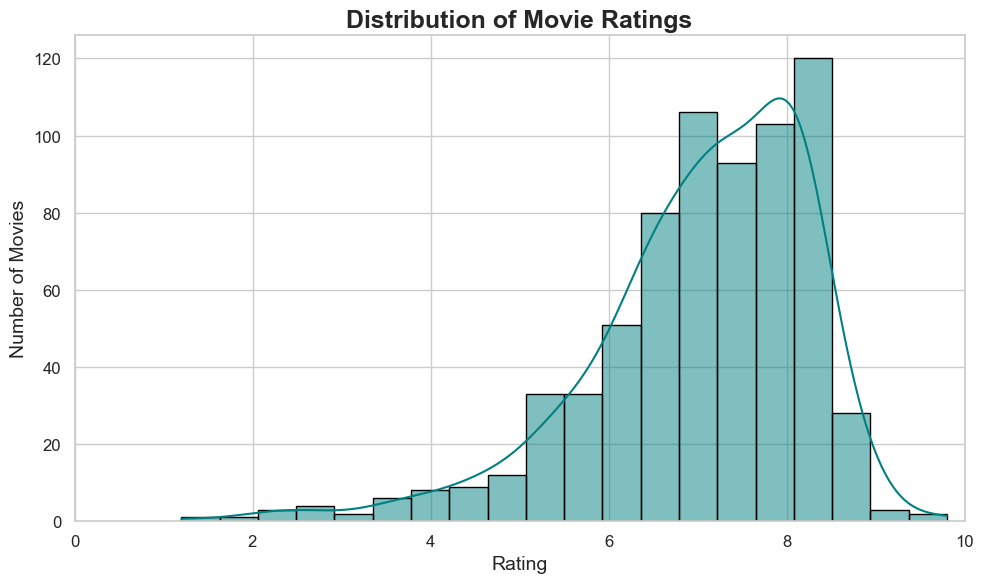

In [7]:
sns.set(style='whitegrid', palette='coolwarm')

# Plotting the histogram
plt.figure(figsize=(10,6))
sns.histplot(data=dff, x='Rating', bins=20, kde=True, color='teal', edgecolor='black')

# Titles and labels
plt.title('Distribution of Movie Ratings', fontsize=18, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)  # Assuming ratings are out of 10
plt.tight_layout()

plt.savefig('rating_distribution.png')
plt.show()

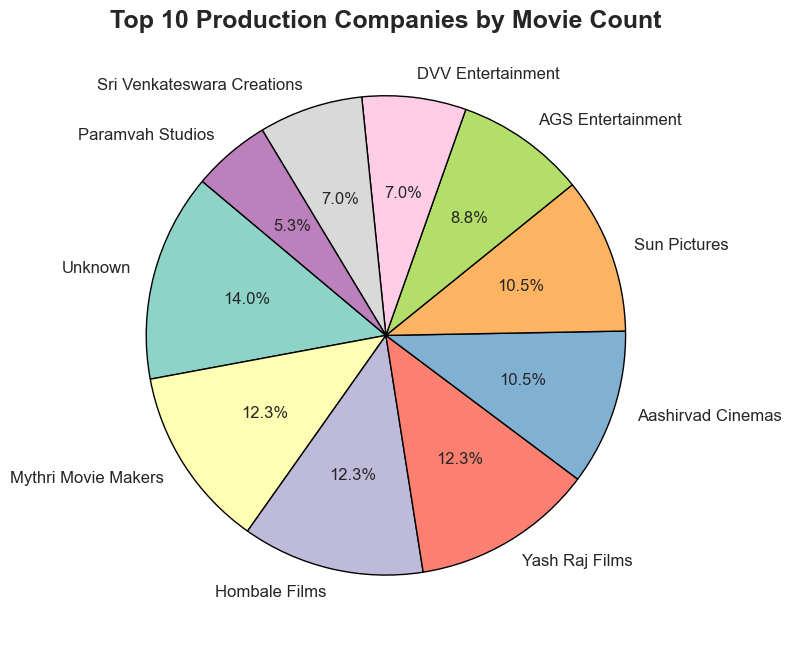

In [8]:
production_counts = dff['Production Company'].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(production_counts, labels=production_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(production_counts)),
        startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

# Title
plt.title('Top 10 Production Companies by Movie Count', fontsize=18, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.savefig('production companies.png')
plt.show()

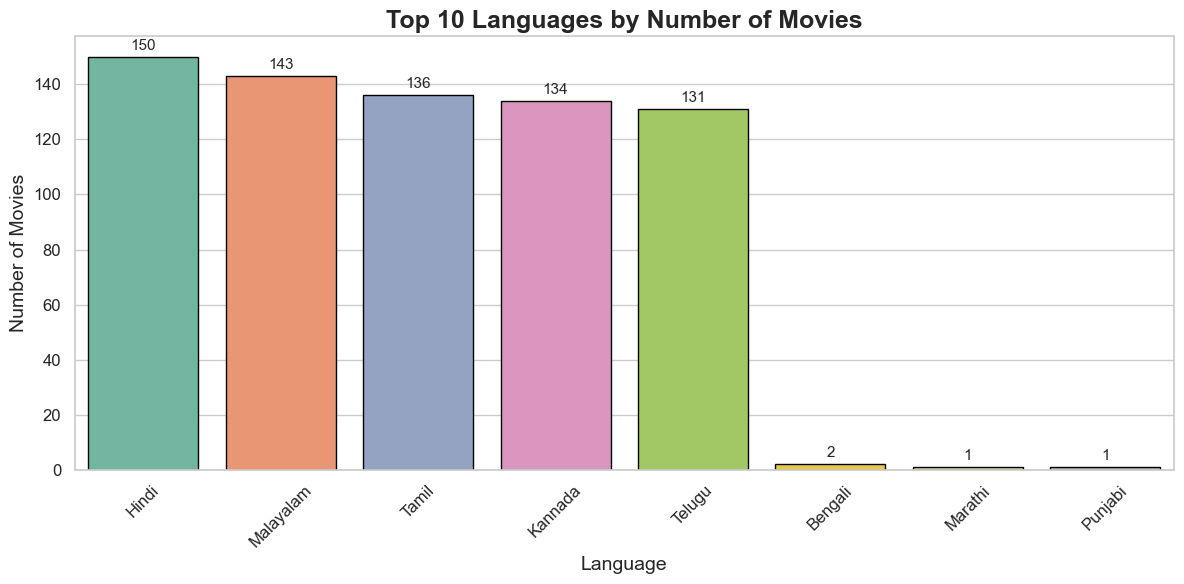

In [9]:
top_languages = dff['Primary_Language'].value_counts().head(10).reset_index()
top_languages.columns = ['Language', 'Count']

# Set seaborn style
sns.set(style='whitegrid', palette='pastel')

# Plotting
plt.figure(figsize=(12,6))
barplot = sns.barplot(data=top_languages, x='Language', y='Count', palette='Set2', edgecolor='black')

# Add count labels on top of each bar
for i in barplot.containers:
    barplot.bar_label(i, fmt='%d', fontsize=11, padding=3)

# Titles and labels
plt.title('Top 10 Languages by Number of Movies', fontsize=18, fontweight='bold')
plt.xlabel('Language', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('top 10 Languages.png')
plt.show()

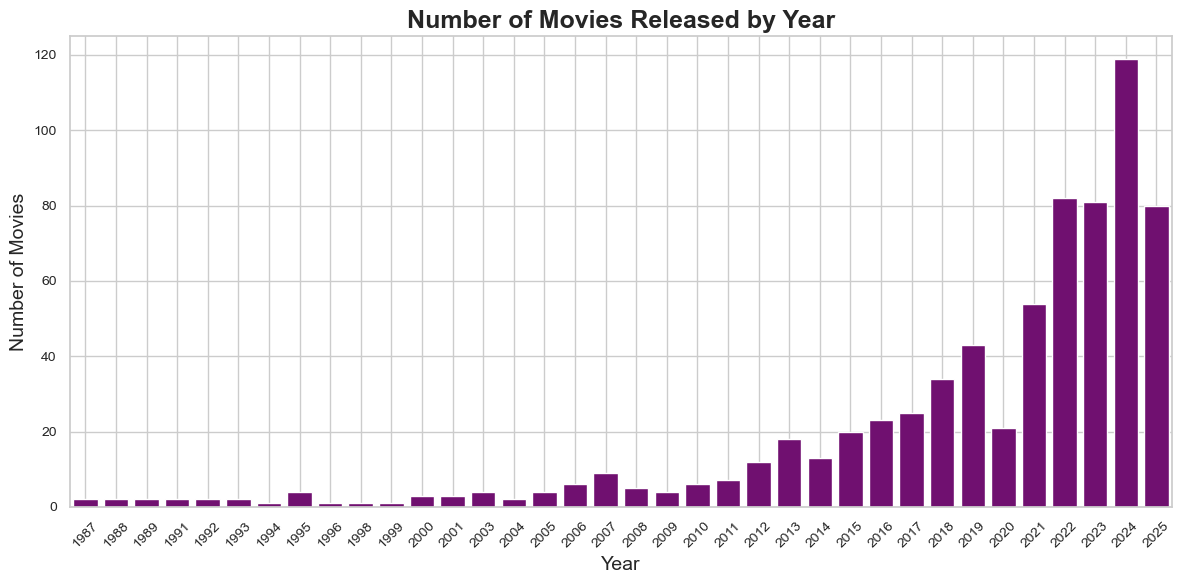

In [10]:
movies_per_year = dff['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color='purple')

plt.title('Number of Movies Released by Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bivariate Analysis

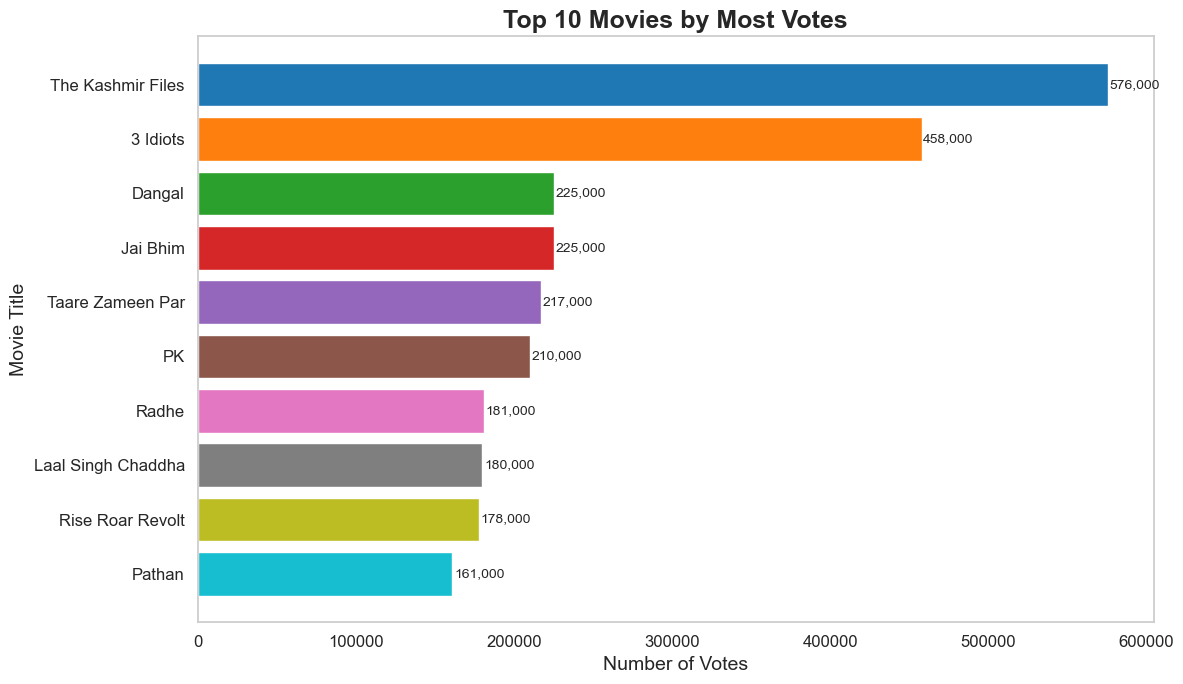

In [12]:
top_voted = dff[['Title', 'Votes']].dropna().sort_values(by='Votes', ascending=False).head(10)

# Generate distinct colors for each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(top_voted)))

# Create horizontal bar plot without edge lines
plt.figure(figsize=(12, 7))
bars = plt.barh(top_voted['Title'], top_voted['Votes'], color=colors)

# Add vote count labels at the end of each bar
for bar in bars:
    votes = bar.get_width()
    plt.text(votes + 1000, bar.get_y() + bar.get_height()/2,
             f'{int(votes):,}', va='center', fontsize=10)

# Add titles and axis labels
plt.title('Top 10 Movies by Most Votes', fontsize=18, fontweight='bold')
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Show highest-voted movie at the top
plt.tight_layout()
plt.grid(False)

# Save the figure
plt.savefig('top_10_movies_by_votess.png')
plt.show()

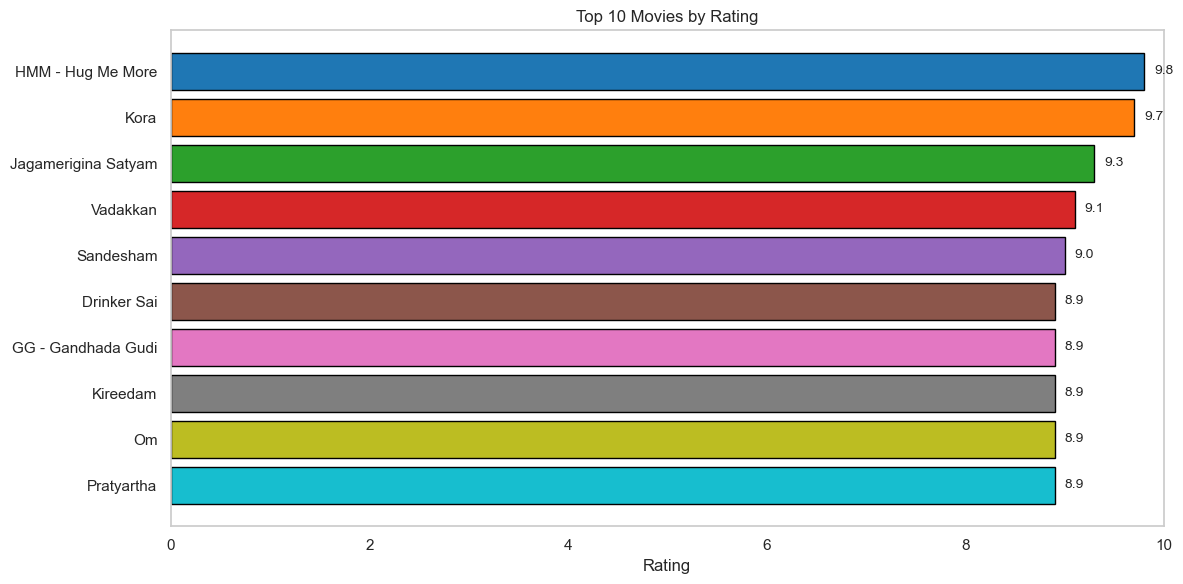

In [13]:
top_movies = dff[['Title', 'Rating']].dropna().sort_values(by='Rating', ascending=False).head(10)

colors = plt.cm.tab10(np.linspace(0, 1, len(top_movies)))

plt.figure(figsize=(12,6))
bars = plt.barh(top_movies['Title'], top_movies['Rating'], color=colors,edgecolor='black')

# Add rating labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', va='center', fontsize=10)

plt.xlabel('Rating')
plt.title('Top 10 Movies by Rating')
plt.gca().invert_yaxis()  # Highest rated at the top
plt.xlim(0, 10)  # Assuming ratings are out of 10
plt.tight_layout()
plt.savefig('top_10_movies_by_ratings.png')
plt.grid(False)
plt.show()

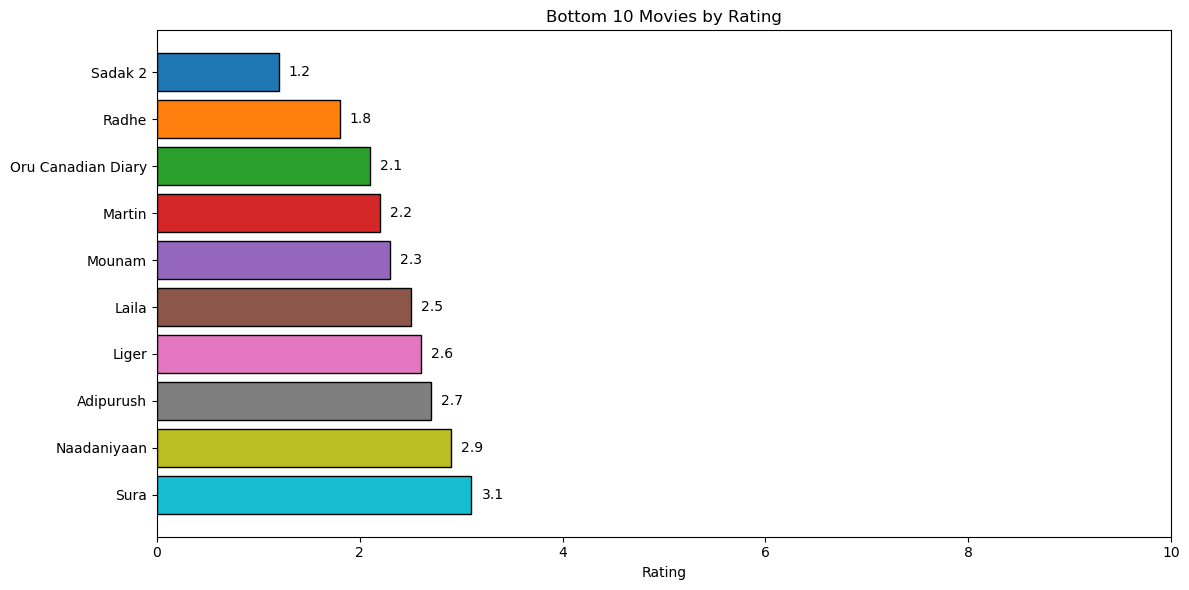

In [45]:
bottom_movies = dff[['Title', 'Rating']].dropna().sort_values(by='Rating', ascending=True).head(10)

# Step 2: Assign distinct colors
colors = plt.cm.tab10(np.linspace(0, 1, len(bottom_movies)))

# Step 3: Create horizontal bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(bottom_movies['Title'], bottom_movies['Rating'], color=colors, edgecolor='black')

# Step 4: Add rating labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}', va='center', fontsize=10)

# Final plot adjustments
plt.xlabel('Rating')
plt.title('Bottom 10 Movies by Rating')
plt.xlim(0, 10)  # Adjust if your ratings are on a different scale
plt.tight_layout()
plt.grid(False)
plt.gca().invert_yaxis()  # Lowest rated at the top (optional)

# Save and show the plot
plt.savefig('bottom_10_movies_by_ratings.png')
plt.show()

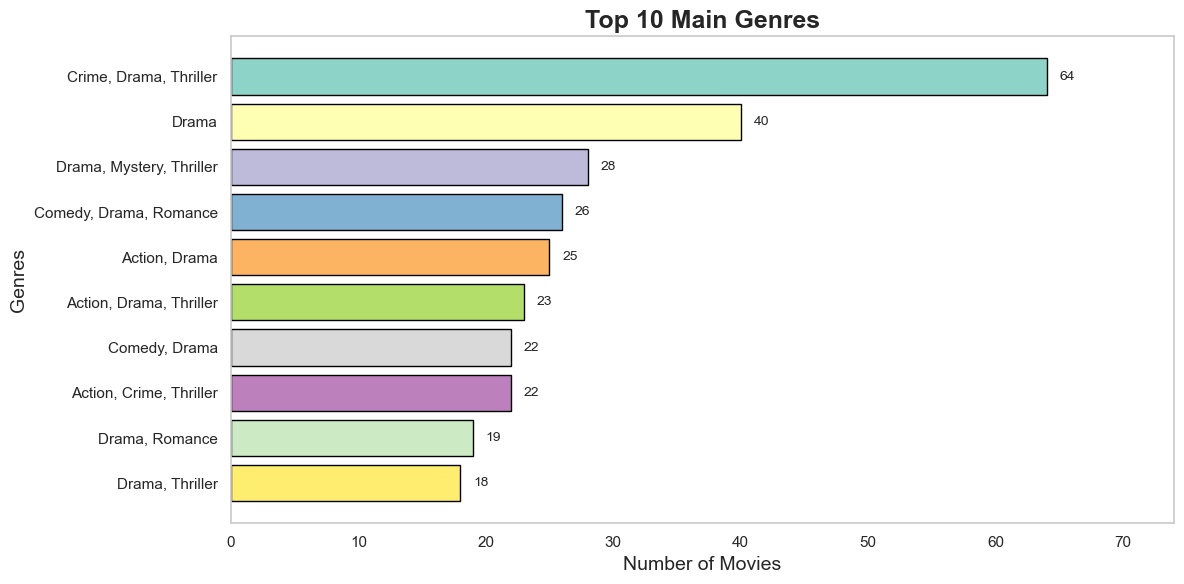

In [14]:
genre_counts = dff['Genre_Cleaned'].value_counts().head(10)

# Generate unique colors
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_counts)))

# Plotting
plt.figure(figsize=(12,6))
bars = plt.barh(genre_counts.index, genre_counts.values, color=colors, edgecolor='black')

# Add actual count labels at the end of each bar
for bar, actual_value in zip(bars, genre_counts.values):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{actual_value}', va='center', fontsize=10)

# Titles and labels
plt.title('Top 10 Main Genres', fontsize=18, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.xlim(0, max(genre_counts.values) + 10)  # Add some padding after the largest count
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top
plt.tight_layout()
plt.grid(False)

# Show the plot
plt.show()

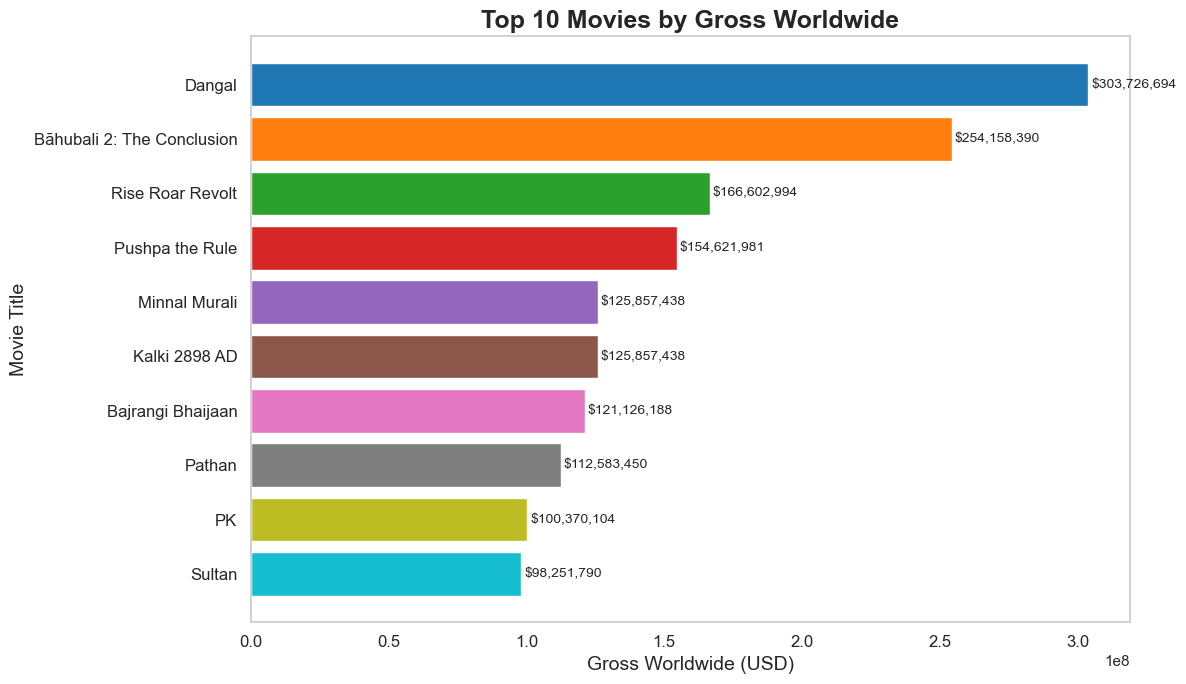

In [15]:
top_grossing = dff[['Title', 'Gross Worldwide']].dropna()\
                  .sort_values(by='Gross Worldwide', ascending=False).head(10)

# Generate unique colors
colors = plt.cm.tab10(np.linspace(0, 1, len(top_grossing)))

# Plotting
plt.figure(figsize=(12,7))
bars = plt.barh(top_grossing['Title'], top_grossing['Gross Worldwide'], color=colors)

# Add gross labels at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1e6, bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}', va='center', fontsize=10)

plt.title('Top 10 Movies by Gross Worldwide', fontsize=18, fontweight='bold')
plt.xlabel('Gross Worldwide (USD)', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.savefig('top_10_grosss_worldd_wide.png')
plt.grid(False)
plt.show()

# Multivariate Analysis

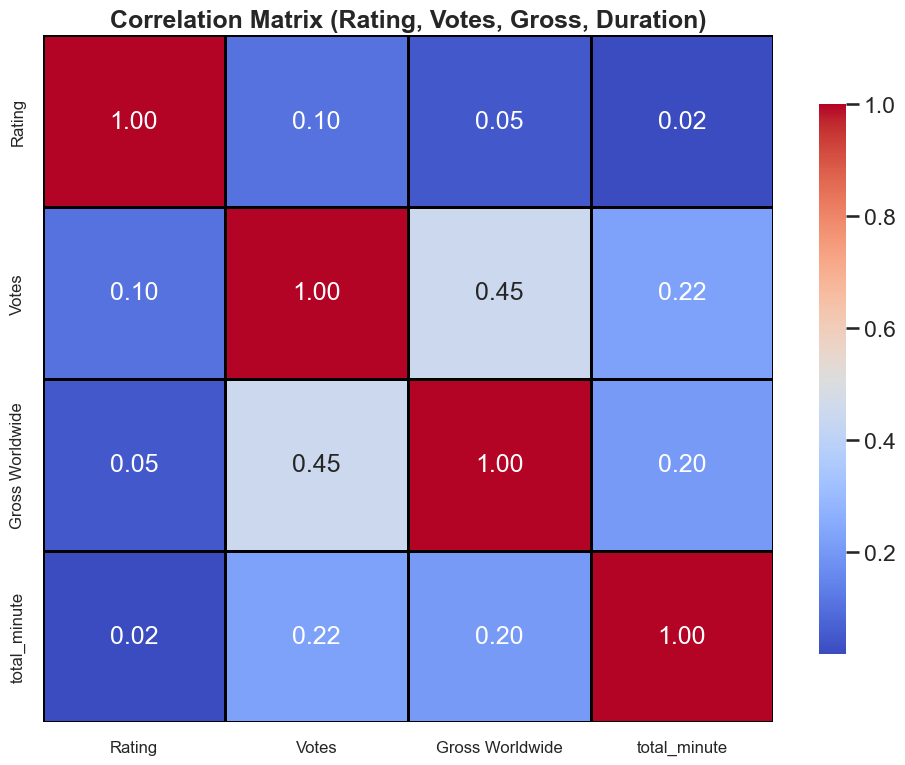

In [29]:
# Select the relevant numerical columns
corr_data = dff[['Rating', 'Votes', 'Gross Worldwide', 'total_minute']]

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black', fmt='.2f', cbar_kws={'shrink': 0.8})

# Titles and labels
plt.title('Correlation Matrix (Rating, Votes, Gross, Duration)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Corr.png")
plt.show()


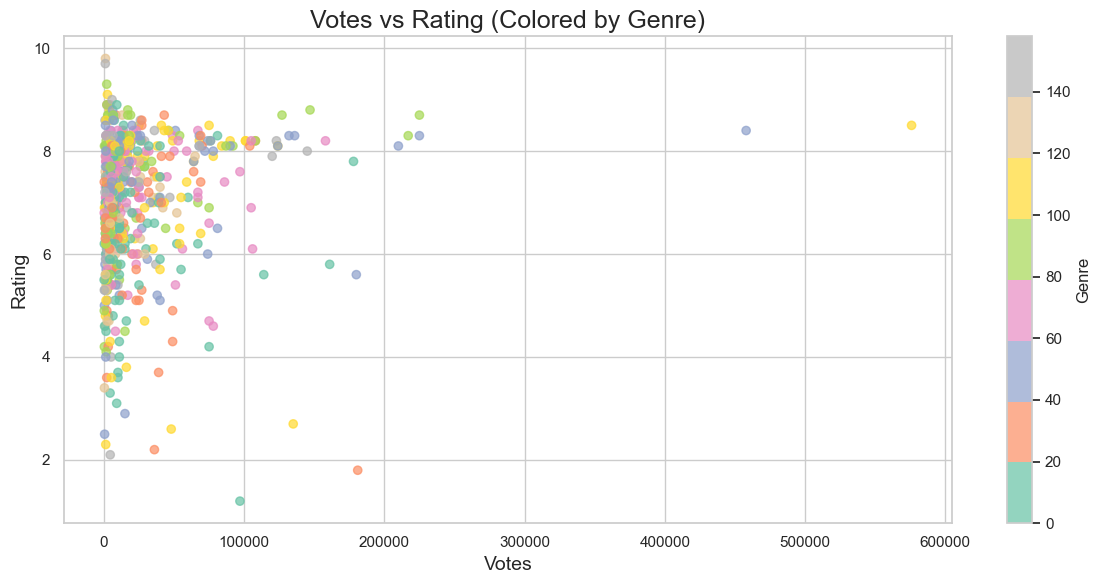

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(data=dff, x='Votes', y='Rating', c=dff['Genre_Cleaned'].astype('category').cat.codes, cmap='Set2', alpha=0.7)

# Adding titles and labels
plt.title('Votes vs Rating (Colored by Genre)', fontsize=18)
plt.xlabel('Votes', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Adding color bar to indicate Genre_Cleaned
plt.colorbar(label='Genre')

# Show plot
plt.tight_layout()
plt.show()

In [23]:
dff.columns

Index(['Title', 'Year', 'Rating', 'Directors', 'Stars', 'Votes',
       'Gross Worldwide', 'Production Company', 'total_minute',
       'Primary_Language', 'Genre_Cleaned'],
      dtype='object')